In [ ]:
import mlflow


In [2]:
import pandas as pd

df = pd.read_csv(r'C:\Users\dlwlg\team901\data.csv')


In [3]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [4]:
df.iloc[:,-15:]

,25592,25593,25594,25595,25596,25597,25598,25599,fault_type,pitch_diameter,ball_diameter,contact_angle,ball_count,Hz,speed
0,0.173103,0.548901,0.481414,0.422957,0.223891,0.001842,-0.218857,0.000951,1,34.0,7.5,0,12,25600,1800
1,0.358700,0.048618,-0.172239,0.098558,1.466061,1.252963,0.190932,-0.384616,1,34.0,7.5,0,12,25600,1800
2,0.999439,0.847681,0.051769,0.890592,1.043328,0.884492,0.792582,0.220288,1,34.0,7.5,0,12,25600,1800
3,-1.051428,-1.167517,-1.048143,0.088135,-0.213551,-0.387816,-0.188670,0.041774,1,34.0,7.5,0,12,25600,1800
4,-0.140300,0.295603,-0.060675,-0.335117,-0.440216,-0.322704,0.446788,0.769093,1,34.0,7.5,0,12,25600,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,-0.070836,-0.014751,-0.022985,-0.063500,-0.070610,0.041211,0.067359,-0.003533,0,46.5,9.0,0,13,25600,1800
1715,0.074139,0.009022,-0.022179,0.018452,0.001435,-0.043908,-0.009173,0.078699,0,46.5,9.0,0,13,25600,1800
1716,0.009046,0.147631,0.093811,-0.103642,-0.123845,-0.017547,0.111096,0.095404,0,46.5,9.0,0,13,25600,1800
1717,-0.028356,-0.137260,-0.060539,0.060279,0.118090,-0.005169,-0.002489,-0.086101,0,46.5,9.0,0,13,25600,1800


In [5]:
import numpy as np

# 회전 주파수 (Hz)로 변환
df['f'] = df['speed'] / 60  # 회전 주파수 f

# 접촉각 (phi) 값이 0도이므로 코사인 0을 사용
phi = np.radians(df['contact_angle'])  # 라디안 변환

# FTF 계산
df['FTF'] = (df['f'] / 2) * (1 - (df['ball_diameter'] / df['pitch_diameter']) * np.cos(phi))

# BSF 계산
df['BSF'] = (df['f'] * df['pitch_diameter'] / (2 * df['ball_diameter'])) * \
            (1 - ((df['ball_diameter'] / df['pitch_diameter']) * np.cos(phi)) ** 2)

# BPFO 계산
df['BPFO'] = (df['ball_count'] / 2) * df['f'] * (1 - (df['ball_diameter'] / df['pitch_diameter']) * np.cos(phi))

# BPFI 계산
df['BPFI'] = (df['ball_count'] / 2) * df['f'] * (1 + (df['ball_diameter'] / df['pitch_diameter']) * np.cos(phi))




In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,ball_diameter,contact_angle,ball_count,Hz,speed,f,FTF,BSF,BPFO,BPFI
0,-0.202268,-0.353959,-0.119095,0.247844,0.120783,-0.263038,-0.537206,-0.576838,-0.453532,-0.279206,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882
1,0.809660,0.977984,-0.025524,-1.094791,-1.556198,-0.060669,1.057084,0.878002,0.246451,-0.800890,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882
2,-0.283242,-0.188273,-0.175738,-0.118942,-0.096620,0.050365,-0.066805,-0.234286,0.166423,0.164054,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882
3,0.144290,0.030802,0.245908,0.400738,0.250939,0.376150,-0.265817,0.010329,0.693247,-0.277882,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882
4,0.147031,0.113169,0.218939,-0.442279,-0.780985,-0.673755,-0.355651,-0.073637,-0.030152,0.159664,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882


In [7]:
df['BPFO']

0       140.294118
1       140.294118
2       140.294118
3       140.294118
4       140.294118
           ...    
1714    157.258065
1715    157.258065
1716    157.258065
1717    157.258065
1718    157.258065
Name: BPFO, Length: 1719, dtype: float64

In [8]:
df['BPFI']

0       219.705882
1       219.705882
2       219.705882
3       219.705882
4       219.705882
           ...    
1714    232.741935
1715    232.741935
1716    232.741935
1717    232.741935
1718    232.741935
Name: BPFI, Length: 1719, dtype: float64

In [9]:
df['BSF']

0       64.691176
1       64.691176
2       64.691176
3       64.691176
4       64.691176
          ...    
1714    74.596774
1715    74.596774
1716    74.596774
1717    74.596774
1718    74.596774
Name: BSF, Length: 1719, dtype: float64

In [10]:
from scipy.fft import fft, fftfreq

def apply_fft(signal, sample_rate):
    N = len(signal)  # 신호의 길이
    T = 1.0 / sample_rate  # 샘플 간격
    
    # FFT 적용
    yf = fft(signal)  # FFT 변환
    xf = fftfreq(N, T)[:N // 2]  # 주파수 성분 계산
    amplitude = 2.0 / N * np.abs(yf[0:N // 2])  # 진폭 계산
    
    return xf, amplitude  # 주파수와 진폭 반환


In [11]:
def find_peak_near_bpf_i(xf, yf, BPFI, tolerance=5):
    # BPFI 근처 범위 설정 (± tolerance)
    lower_bound = BPFI - tolerance
    upper_bound = BPFI + tolerance
    
    # 주파수 성분 중 BPFI 근처의 진폭 값 선택
    peak_amp = yf[(xf >= lower_bound) & (xf <= upper_bound)]
    
    # 가장 큰 피크 값을 반환, 없으면 0 반환
    return np.max(peak_amp) if len(peak_amp) > 0 else 0

In [12]:
# 예시: 첫 번째 행을 사용
sample_rate = 25600  # 샘플링 속도
row_idx = 0  # 첫 번째 행을 사용

# 진동 신호 데이터 가져오기 (첫 번째 행)
signal = df.iloc[row_idx, :-12].values  # 진동 신호 값
BPFI = df['BPFI'].values[row_idx]  # BPFI 값 가져오기

# FFT 적용
xf, yf = apply_fft(signal, sample_rate)

# BPFI 근처에서 피크 값 찾기
bpf_i_peak = find_peak_near_bpf_i(xf, yf, BPFI)

# 결과 출력
print(f'Row {row_idx} - BPFI: {BPFI} Hz, BPFI 근처 피크 값: {bpf_i_peak}')

Row 0 - BPFI: 219.7058823529412 Hz, BPFI 근처 피크 값: 0.010726864127884648


In [13]:
# 여러 행에 대해 BPFI 피크 값을 계산
def process_multiple_rows(df, rows, sample_rate, tolerance=5):
    for row_idx in rows:
        # 각 행에 대해 신호 데이터와 BPFI 값을 가져옴
        signal = df.iloc[row_idx, :-12].values  # 진동 신호 데이터
        BPFI = df['BPFI'].values[row_idx]  # BPFI 값 가져오기
        
        # FFT 적용
        xf, yf = apply_fft(signal, sample_rate)
        
        # BPFI 근처에서 피크 값 찾기
        bpf_i_peak = find_peak_near_bpf_i(xf, yf, BPFI, tolerance)
        
        # 결과 출력
        print(f'Row {row_idx} - BPFI: {BPFI} Hz, BPFI 근처 피크 값: {bpf_i_peak}')

# 실행 예시
sample_rate = 25600  # 샘플링 속도
rows_to_process = [0, 199, 299, 499]  # 여러 행을 처리하고 싶을 때

# 여러 행에 대해 BPFI 근처 피크 값 처리
process_multiple_rows(df, rows_to_process, sample_rate)


Row 0 - BPFI: 219.7058823529412 Hz, BPFI 근처 피크 값: 0.010726864127884648
Row 199 - BPFI: 219.7058823529412 Hz, BPFI 근처 피크 값: 0.008687299098290168
Row 299 - BPFI: 219.7058823529412 Hz, BPFI 근처 피크 값: 0.016078242661575644
Row 499 - BPFI: 232.74193548387098 Hz, BPFI 근처 피크 값: 0.001961479508308082


In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,ball_diameter,contact_angle,ball_count,Hz,speed,f,FTF,BSF,BPFO,BPFI
0,-0.202268,-0.353959,-0.119095,0.247844,0.120783,-0.263038,-0.537206,-0.576838,-0.453532,-0.279206,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882
1,0.809660,0.977984,-0.025524,-1.094791,-1.556198,-0.060669,1.057084,0.878002,0.246451,-0.800890,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882
2,-0.283242,-0.188273,-0.175738,-0.118942,-0.096620,0.050365,-0.066805,-0.234286,0.166423,0.164054,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882
3,0.144290,0.030802,0.245908,0.400738,0.250939,0.376150,-0.265817,0.010329,0.693247,-0.277882,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882
4,0.147031,0.113169,0.218939,-0.442279,-0.780985,-0.673755,-0.355651,-0.073637,-0.030152,0.159664,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882


In [15]:
import numpy as np
from scipy.fft import fft, fftfreq

# 푸리에 변환 적용 함수 (FFT)
def apply_fft(signal, sample_rate):
    N = len(signal)
    T = 1.0 / sample_rate
    yf = fft(signal)
    xf = fftfreq(N, T)[:N // 2]
    amplitude = 2.0 / N * np.abs(yf[0:N // 2])
    return xf, amplitude

# 특정 결함 주파수 근처에서 피크 찾기 함수
def find_peak_near_frequency(xf, yf, target_frequency, tolerance=5):
    lower_bound = target_frequency - tolerance
    upper_bound = target_frequency + tolerance
    peak_amp = yf[(xf >= lower_bound) & (xf <= upper_bound)]
    return np.max(peak_amp) if len(peak_amp) > 0 else 0

# 행별로 fault_type에 맞는 결함 주파수 적용 및 피크 찾기
def process_row_based_on_fault_type(df, row_idx, sample_rate, tolerance=5):
    fault_type = df['fault_type'].values[row_idx]  # fault_type 가져오기
    signal = df.iloc[row_idx, :-12].values  # 진동 신호 데이터
    
    # fault_type에 따라 처리 다르게 하기
    if fault_type == 0:
        print(f"Row {row_idx}: 정상 상태 (분석 생략)")
        return 0  # 정상일 때는 0 반환

    # FFT 적용
    xf, yf = apply_fft(signal, sample_rate)
    
    # fault_type에 따라 분석할 결함 주파수 선택
    if fault_type == 1:
        # 내륜 결함 (BPFI)
        BPFI = df['BPFI'].values[row_idx]
        peak_value = find_peak_near_frequency(xf, yf, BPFI, tolerance)
        print(f"Row {row_idx}: BPFI 주파수 {BPFI} Hz 근처 피크 값: {peak_value}")
    
    elif fault_type == 2:
        # 볼 결함 (BSF)
        BSF = df['BSF'].values[row_idx]
        peak_value = find_peak_near_frequency(xf, yf, BSF, tolerance)
        print(f"Row {row_idx}: BSF 주파수 {BSF} Hz 근처 피크 값: {peak_value}")
    
    elif fault_type == 3:
        # 외륜 결함 (BPFO)
        BPFO = df['BPFO'].values[row_idx]
        peak_value = find_peak_near_frequency(xf, yf, BPFO, tolerance)
        print(f"Row {row_idx}: BPFO 주파수 {BPFO} Hz 근처 피크 값: {peak_value}")
    
    return peak_value  # 피크 값 반환

# 여러 행에 대해 처리하는 함수
def process_multiple_rows(df, rows, sample_rate, tolerance=5):
    for row_idx in rows:
        process_row_based_on_fault_type(df, row_idx, sample_rate, tolerance)

# 실행 예시
sample_rate = 25600  # 샘플링 속도
rows_to_process = [0, 1,5,10,11,20,50]  # 처리할 행들

# 여러 행에 대해 결함 주파수에 맞는 피크 값 계산
process_multiple_rows(df, rows_to_process, sample_rate)


Row 0: BPFI 주파수 219.7058823529412 Hz 근처 피크 값: 0.010726864127884648
Row 1: BPFI 주파수 219.7058823529412 Hz 근처 피크 값: 0.0725125140777965
Row 5: BPFI 주파수 219.7058823529412 Hz 근처 피크 값: 0.0089580534769456
Row 10: BPFI 주파수 219.7058823529412 Hz 근처 피크 값: 0.021775550372899483
Row 11: BPFI 주파수 219.7058823529412 Hz 근처 피크 값: 0.01402917291012463
Row 20: BPFI 주파수 219.7058823529412 Hz 근처 피크 값: 0.009602324668610702
Row 50: BPFI 주파수 219.7058823529412 Hz 근처 피크 값: 0.027422717937468116


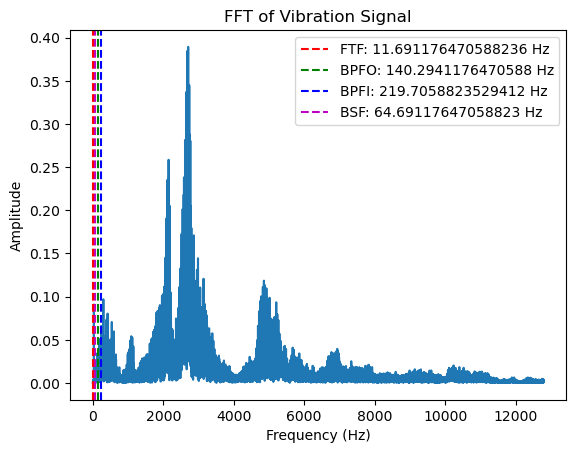

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# 신호 데이터를 추출 (0 ~ 9 열이 진동 신호 데이터로 가정)
signal_data = df.iloc[:1, 0:25599].values

# 베어링 정보 및 결함 주파수 추출 (첫 번째 행을 기준으로 추출)
ball_diameter = df['ball_diameter'][0]
contact_angle = df['contact_angle'][0]
ball_count = df['ball_count'][0]
speed = df['speed'][0]
FTF = df['FTF'][0]
BPFO = df['BPFO'][0]
BPFI = df['BPFI'][0]
BSF = df['BSF'][0]

# FFT 적용 함수
def apply_fft(signal, sample_rate):
    N = len(signal)
    T = 1.0 / sample_rate
    yf = fft(signal)
    xf = fftfreq(N, T)[:N // 2]
    return xf, 2.0 / N * np.abs(yf[0:N // 2])

# 샘플 속도(Hz)
sample_rate = 25600  # 제공된 데이터의 Hz 속도

# 첫 번째 신호 데이터에 대해 FFT 적용
xf, yf = apply_fft(signal_data[0], sample_rate)

# 결함 주파수 비교 (FTF, BPFO, BPFI, BSF)
def plot_fft_with_fault_frequencies(xf, yf, FTF, BPFO, BPFI, BSF):
    plt.plot(xf, yf)
    plt.title('FFT of Vibration Signal')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')

    # 결함 주파수 표시 (FTF, BPFO, BPFI, BSF)
    plt.axvline(x=FTF, color='r', linestyle='--', label=f'FTF: {FTF} Hz')
    plt.axvline(x=BPFO, color='g', linestyle='--', label=f'BPFO: {BPFO} Hz')
    plt.axvline(x=BPFI, color='b', linestyle='--', label=f'BPFI: {BPFI} Hz')
    plt.axvline(x=BSF, color='m', linestyle='--', label=f'BSF: {BSF} Hz')

    plt.legend()
    plt.show()

# FFT 결과 및 결함 주파수 시각화
plot_fft_with_fault_frequencies(xf, yf, FTF, BPFO, BPFI, BSF)


In [17]:
df.shape

(1719, 25612)

In [18]:
df.iloc[:1,:]['fault_type']

0    1
Name: fault_type, dtype: int64

In [19]:
BPFI = df['BPFI'][0]
BPFI

np.float64(219.7058823529412)

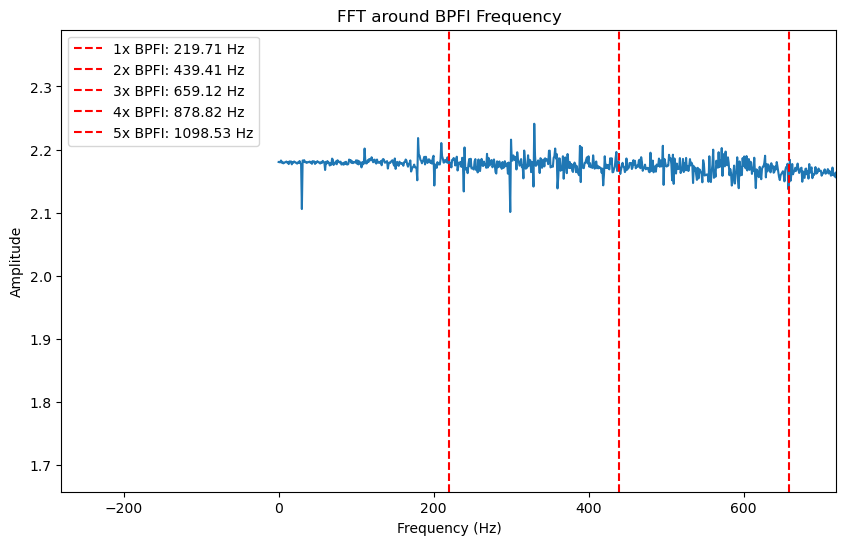

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# 신호 데이터를 추출 (첫 번째 행의 신호 데이터 예시)
signal_data = df.iloc[:, 0:25612].values

# 베어링 정보 및 결함 주파수 추출 (첫 번째 행 기준)
BPFI = df['BPFI'][0]

# FFT 적용 함수
def apply_fft(signal, sample_rate):
    N = len(signal)
    T = 1.0 / sample_rate
    yf = fft(signal)
    xf = fftfreq(N, T)[:N // 2]
    return xf, 2.0 / N * np.abs(yf[0:N // 2])

# 샘플 속도(Hz)
sample_rate = 25600  # 제공된 샘플링 속도

# 첫 번째 신호 데이터에 대해 FFT 적용
xf, yf = apply_fft(signal_data[0], sample_rate)

# BPFI 주파수 근처의 주파수 대역을 확대해서 분석
def plot_bpf_analysis(xf, yf, BPFI):
    plt.figure(figsize=(10, 6))
    plt.plot(xf, yf)
    plt.title('FFT around BPFI Frequency')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')

    # BPFI와 BPFI의 배수(2배, 3배, ...) 표시
    harmonics = [BPFI * i for i in range(1, 6)]  # 최대 5배수까지 확인
    for i, harmonic in enumerate(harmonics):
        plt.axvline(x=harmonic, color='r', linestyle='--', label=f'{i+1}x BPFI: {harmonic:.2f} Hz')
    
    # 범위를 BPFI 근처로 축소 (BPFI ± 500 Hz 범위)
    plt.xlim(BPFI - 500, BPFI + 500)
    plt.legend()
    plt.show()

# BPFI 주파수 대역에서 확대 분석
plot_bpf_analysis(xf, yf, BPFI)


BPFI 근처에서 발견된 피크 주파수: 217.89786037794784 Hz
해당 주파수에서의 진폭: 2.1880163993183466


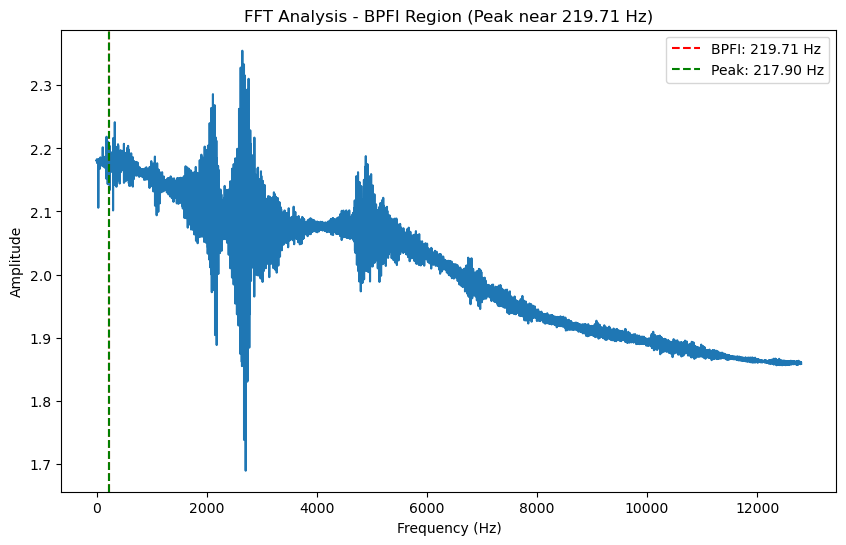

In [104]:
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# BPFI 값 (이 값은 미리 계산된 값을 사용할 수 있음, 여기서는 219.71로 설정)
BPFI = 219.71

# 샘플링 속도(Hz)와 신호 데이터
sample_rate = 25600  # 샘플링 속도 (초당 25600 샘플)
signal_data = df.iloc[:, 0:25612].values  # 예시로 첫 번째 행의 신호 데이터를 사용

# FFT 적용 함수
def apply_fft(signal, sample_rate):
    N = len(signal)
    T = 1.0 / sample_rate
    yf = fft(signal)
    xf = fftfreq(N, T)[:N // 2]
    return xf, 2.0 / N * np.abs(yf[0:N // 2])

# 첫 번째 신호 데이터에 대해 FFT 적용
xf, yf = apply_fft(signal_data[0], sample_rate)

# BPFI 주파수 대역에서 피크를 찾는 함수
def find_peak_near_bpfi(xf, yf, BPFI, tolerance=5):
    # BPFI 근처에서 주파수 범위 설정 (tolerance 값으로 +- 범위 설정)
    lower_bound = BPFI - tolerance
    upper_bound = BPFI + tolerance

    # BPFI 근처에서 피크를 찾기
    peak_frequency = xf[(xf >= lower_bound) & (xf <= upper_bound)]
    peak_amplitude = yf[(xf >= lower_bound) & (xf <= upper_bound)]
    
    if len(peak_amplitude) > 0:
        peak_index = np.argmax(peak_amplitude)  # 최대 진폭 위치 찾기
        return peak_frequency[peak_index], peak_amplitude[peak_index]
    else:
        return None, None

# BPFI 주파수 근처에서 피크 찾기
peak_freq, peak_amp = find_peak_near_bpfi(xf, yf, BPFI)

# 결과 출력 및 시각화
if peak_freq is not None:
    print(f"BPFI 근처에서 발견된 피크 주파수: {peak_freq} Hz")
    print(f"해당 주파수에서의 진폭: {peak_amp}")
    
    # 결과 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(xf, yf)
    plt.axvline(x=BPFI, color='r', linestyle='--', label=f'BPFI: {BPFI} Hz')
    plt.axvline(x=peak_freq, color='g', linestyle='--', label=f'Peak: {peak_freq:.2f} Hz')
    plt.title(f"FFT Analysis - BPFI Region (Peak near {BPFI:.2f} Hz)")
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()
else:
    print("BPFI 근처에서 피크를 찾을 수 없습니다.")

1x BPFI 근처에서 발견된 피크 주파수: 217.90 Hz, 진폭: 2.19
2x BPFI 근처에서 발견된 피크 주파수: 435.80 Hz, 진폭: 2.20
3x BPFI 근처에서 발견된 피크 주파수: 659.69 Hz, 진폭: 2.18
4x BPFI 근처에서 발견된 피크 주파수: 877.59 Hz, 진폭: 2.16
5x BPFI 근처에서 발견된 피크 주파수: 1099.48 Hz, 진폭: 2.17
6x BPFI 근처에서 발견된 피크 주파수: 1315.38 Hz, 진폭: 2.15
7x BPFI 근처에서 발견된 피크 주파수: 1536.28 Hz, 진폭: 2.13
8x BPFI 근처에서 발견된 피크 주파수: 1753.18 Hz, 진폭: 2.11
9x BPFI 근처에서 발견된 피크 주파수: 1982.07 Hz, 진폭: 2.13
10x BPFI 근처에서 발견된 피크 주파수: 2201.97 Hz, 진폭: 2.15
11x BPFI 근처에서 발견된 피크 주파수: 2419.87 Hz, 진폭: 2.12
12x BPFI 근처에서 발견된 피크 주파수: 2631.77 Hz, 진폭: 2.13
13x BPFI 근처에서 발견된 피크 주파수: 2858.66 Hz, 진폭: 2.17
14x BPFI 근처에서 발견된 피크 주파수: 3075.56 Hz, 진폭: 2.11
15x BPFI 근처에서 발견된 피크 주파수: 3291.46 Hz, 진폭: 2.13
16x BPFI 근처에서 발견된 피크 주파수: 3512.35 Hz, 진폭: 2.10
17x BPFI 근처에서 발견된 피크 주파수: 3735.25 Hz, 진폭: 2.11
18x BPFI 근처에서 발견된 피크 주파수: 3958.14 Hz, 진폭: 2.09
19x BPFI 근처에서 발견된 피크 주파수: 4172.04 Hz, 진폭: 2.09


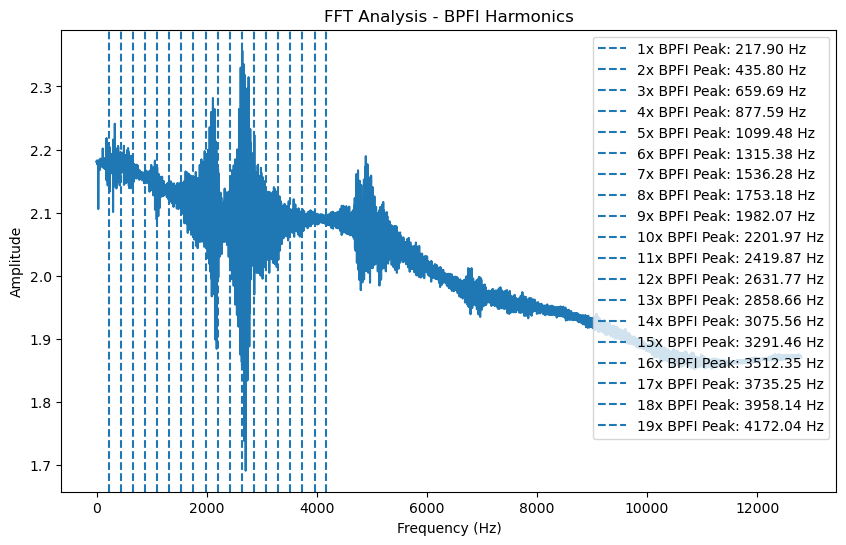

In [21]:
# BPFI 주파수와 그 배수(2x, 3x, 4x, 5x) 주파수 확인
BPFI = 219.71
harmonics = [BPFI * i for i in range(1, 20)]  # 1x, 2x, 3x, 4x, 5x BPFI

# BPFI 배수 주파수에서 피크를 찾는 함수
def find_peaks_near_harmonics(xf, yf, harmonics, tolerance=5):
    peaks = []
    for harmonic in harmonics:
        lower_bound = harmonic - tolerance
        upper_bound = harmonic + tolerance
        peak_freq = xf[(xf >= lower_bound) & (xf <= upper_bound)]
        peak_amp = yf[(xf >= lower_bound) & (xf <= upper_bound)]
        if len(peak_amp) > 0:
            peak_index = np.argmax(peak_amp)
            peaks.append((harmonic, peak_freq[peak_index], peak_amp[peak_index]))
    return peaks

# BPFI 배수 주파수 근처에서 피크 찾기
peaks = find_peaks_near_harmonics(xf, yf, harmonics)

# 결과 출력 및 시각화
if peaks:
    for harmonic, freq, amp in peaks:
        print(f"{harmonic / BPFI:.0f}x BPFI 근처에서 발견된 피크 주파수: {freq:.2f} Hz, 진폭: {amp:.2f}")
    
    # 그래프 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(xf, yf)
    for harmonic, freq, amp in peaks:
        plt.axvline(x=freq, linestyle='--', label=f'{harmonic / BPFI:.0f}x BPFI Peak: {freq:.2f} Hz')
    plt.title('FFT Analysis - BPFI Harmonics')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()
else:
    print("BPFI 및 그 배수에서 피크를 찾을 수 없습니다.")


1x BPFI 근처에서 발견된 피크 주파수: 217.90 Hz, 진폭: 2.19
2x BPFI 근처에서 발견된 피크 주파수: 435.80 Hz, 진폭: 2.20
3x BPFI 근처에서 발견된 피크 주파수: 659.69 Hz, 진폭: 2.18
4x BPFI 근처에서 발견된 피크 주파수: 877.59 Hz, 진폭: 2.16
5x BPFI 근처에서 발견된 피크 주파수: 1099.48 Hz, 진폭: 2.17
6x BPFI 근처에서 발견된 피크 주파수: 1315.38 Hz, 진폭: 2.15
7x BPFI 근처에서 발견된 피크 주파수: 1536.28 Hz, 진폭: 2.13
8x BPFI 근처에서 발견된 피크 주파수: 1753.18 Hz, 진폭: 2.11
9x BPFI 근처에서 발견된 피크 주파수: 1982.07 Hz, 진폭: 2.13
10x BPFI 근처에서 발견된 피크 주파수: 2201.97 Hz, 진폭: 2.15
11x BPFI 근처에서 발견된 피크 주파수: 2419.87 Hz, 진폭: 2.12
12x BPFI 근처에서 발견된 피크 주파수: 2631.77 Hz, 진폭: 2.13
13x BPFI 근처에서 발견된 피크 주파수: 2858.66 Hz, 진폭: 2.17
14x BPFI 근처에서 발견된 피크 주파수: 3075.56 Hz, 진폭: 2.11
15x BPFI 근처에서 발견된 피크 주파수: 3291.46 Hz, 진폭: 2.13
16x BPFI 근처에서 발견된 피크 주파수: 3512.35 Hz, 진폭: 2.10
17x BPFI 근처에서 발견된 피크 주파수: 3735.25 Hz, 진폭: 2.11
18x BPFI 근처에서 발견된 피크 주파수: 3958.14 Hz, 진폭: 2.09
19x BPFI 근처에서 발견된 피크 주파수: 4172.04 Hz, 진폭: 2.09


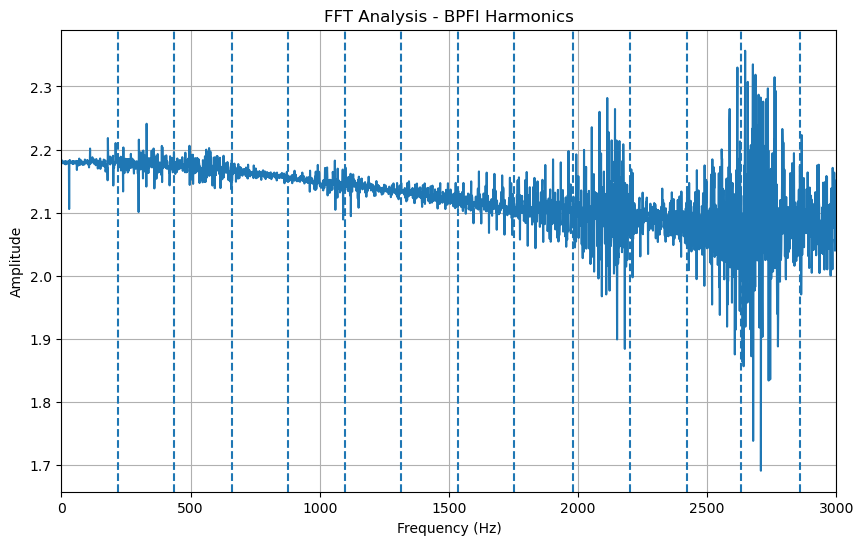

In [22]:
# BPFI 주파수와 그 배수(2x, 3x, 4x, 5x) 주파수 확인
BPFI = 219.71
harmonics = [BPFI * i for i in range(1, 20)]  # 1x, 2x, 3x, 4x, 5x BPFI

# BPFI 배수 주파수에서 피크를 찾는 함수
def find_peaks_near_harmonics(xf, yf, harmonics, tolerance=5):
    peaks = []
    for harmonic in harmonics:
        lower_bound = harmonic - tolerance
        upper_bound = harmonic + tolerance
        peak_freq = xf[(xf >= lower_bound) & (xf <= upper_bound)]
        peak_amp = yf[(xf >= lower_bound) & (xf <= upper_bound)]
        if len(peak_amp) > 0:
            peak_index = np.argmax(peak_amp)
            peaks.append((harmonic, peak_freq[peak_index], peak_amp[peak_index]))
    return peaks

# BPFI 배수 주파수 근처에서 피크 찾기
peaks = find_peaks_near_harmonics(xf, yf, harmonics)

# 결과 출력 및 시각화
if peaks:
    for harmonic, freq, amp in peaks:
        print(f"{harmonic / BPFI:.0f}x BPFI 근처에서 발견된 피크 주파수: {freq:.2f} Hz, 진폭: {amp:.2f}")
    
    # 그래프 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(xf, yf)
    for harmonic, freq, amp in peaks:
        plt.axvline(x=freq, linestyle='--', label=f'{harmonic / BPFI:.0f}x BPFI Peak: {freq:.2f} Hz')
    
    # x축을 0에서 3000Hz까지 제한
    plt.xlim(0, 3000)
    
    plt.title('FFT Analysis - BPFI Harmonics')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()
else:
    print("BPFI 및 그 배수에서 피크를 찾을 수 없습니다.")


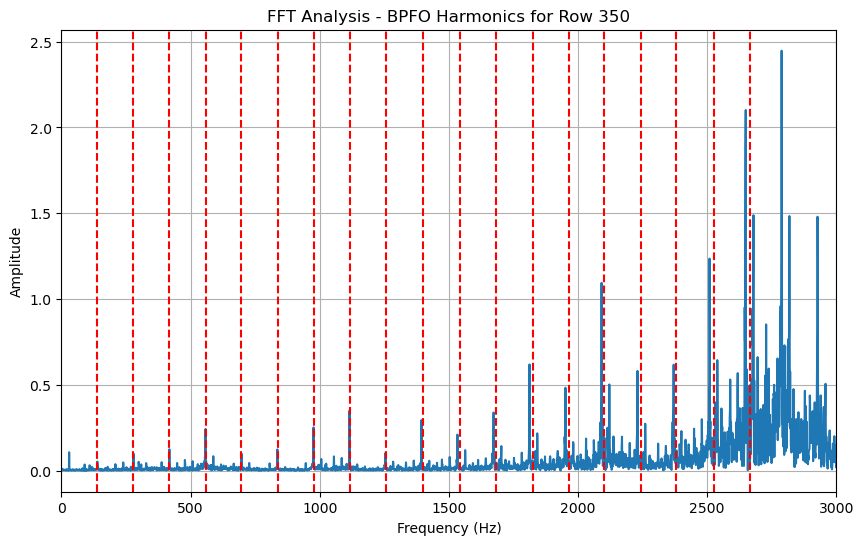

In [23]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

# BPFO 주파수와 그 배수(1x, 2x, 3x, ...) 주파수 확인
BPFO = df['BPFO'].values[350]  # 350번째 행에서 BPFO 값 가져오기
harmonics_bpfo = [BPFO * i for i in range(1, 20)]  # 1x, 2x, 3x, ... BPFO

# BPFO 배수 주파수에서 피크를 찾는 함수
def find_peaks_near_harmonics(xf, yf, harmonics, tolerance=5):
    peaks = []
    for harmonic in harmonics:
        lower_bound = harmonic - tolerance
        upper_bound = harmonic + tolerance
        peak_freq = xf[(xf >= lower_bound) & (xf <= upper_bound)]
        peak_amp = yf[(xf >= lower_bound) & (xf <= upper_bound)]
        if len(peak_amp) > 0:
            peak_index = np.argmax(peak_amp)
            peaks.append((harmonic, peak_freq[peak_index], peak_amp[peak_index]))
    return peaks

# 진동 신호 데이터 가져오기 (350번째 행의 데이터)
signal = df.iloc[350, :-12].values  # 350번째 행의 진동 신호

# 샘플링 속도 설정
sample_rate = 25600  # 샘플링 속도 (Hz)

# FFT 적용 함수
def apply_fft(signal, sample_rate):
    N = len(signal)  # 신호의 길이
    T = 1.0 / sample_rate  # 샘플 간격 (시간)
    
    # 푸리에 변환 (FFT) 적용
    yf = fft(signal)
    xf = fftfreq(N, T)[:N // 2]  # 주파수 범위 계산
    amplitude = 2.0 / N * np.abs(yf[0:N // 2])  # 진폭 계산
    
    return xf, amplitude  # 주파수 성분과 진폭 반환

# FFT 적용 후 BPFO 배수 주파수 근처에서 피크 찾기
xf, yf = apply_fft(signal, sample_rate)
peaks_bpfo = find_peaks_near_harmonics(xf, yf, harmonics_bpfo)

# 결과 출력 및 시각화
plt.figure(figsize=(10, 6))
plt.plot(xf, yf, label='FFT Magnitude')

# BPFO 배수 피크 시각화
for harmonic, freq, amp in peaks_bpfo:
    plt.axvline(x=freq, color='r', linestyle='--', label=f'{harmonic / BPFO:.0f}x BPFO Peak: {freq:.2f} Hz')

# x축을 0에서 3000Hz까지 제한
plt.xlim(0, 3000)

# 그래프 설정
plt.title('FFT Analysis - BPFO Harmonics for Row 350')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [24]:
df.iloc[:,:-12]

,0,1,2,3,4,5,6,7,8,9,...,25590,25591,25592,25593,25594,25595,25596,25597,25598,25599
0,-0.202268,-0.353959,-0.119095,0.247844,0.120783,-0.263038,-0.537206,-0.576838,-0.453532,-0.279206,...,-0.068386,0.071124,0.173103,0.548901,0.481414,0.422957,0.223891,0.001842,-0.218857,0.000951
1,0.809660,0.977984,-0.025524,-1.094791,-1.556198,-0.060669,1.057084,0.878002,0.246451,-0.800890,...,-0.228638,-0.246382,0.358700,0.048618,-0.172239,0.098558,1.466061,1.252963,0.190932,-0.384616
2,-0.283242,-0.188273,-0.175738,-0.118942,-0.096620,0.050365,-0.066805,-0.234286,0.166423,0.164054,...,-0.019901,-0.197872,0.999439,0.847681,0.051769,0.890592,1.043328,0.884492,0.792582,0.220288
3,0.144290,0.030802,0.245908,0.400738,0.250939,0.376150,-0.265817,0.010329,0.693247,-0.277882,...,-0.277607,-0.855152,-1.051428,-1.167517,-1.048143,0.088135,-0.213551,-0.387816,-0.188670,0.041774
4,0.147031,0.113169,0.218939,-0.442279,-0.780985,-0.673755,-0.355651,-0.073637,-0.030152,0.159664,...,0.833582,-0.257708,-0.140300,0.295603,-0.060675,-0.335117,-0.440216,-0.322704,0.446788,0.769093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,-0.052208,-0.047765,-0.057964,-0.077043,-0.010430,-0.000896,-0.038360,-0.003680,0.028351,0.063056,...,-0.083922,-0.131187,-0.070836,-0.014751,-0.022985,-0.063500,-0.070610,0.041211,0.067359,-0.003533
1715,0.016248,0.038758,0.070990,0.059766,-0.023504,-0.034588,0.012580,-0.070610,-0.062291,-0.029186,...,0.078668,0.061585,0.074139,0.009022,-0.022179,0.018452,0.001435,-0.043908,-0.009173,0.078699
1716,0.012629,-0.012334,-0.036590,0.050409,0.040265,0.059400,-0.026275,0.041706,0.084198,0.056348,...,-0.078838,0.169872,0.009046,0.147631,0.093811,-0.103642,-0.123845,-0.017547,0.111096,0.095404
1717,-0.144944,-0.141777,0.059033,0.094421,0.037653,0.050934,0.086682,-0.025554,-0.001824,0.029017,...,0.058161,0.091125,-0.028356,-0.137260,-0.060539,0.060279,0.118090,-0.005169,-0.002489,-0.086101


In [25]:
# 샘플 데이터
sample_rate = 25600  # 샘플링 속도
# 데이터프레임에서 첫 25612열이 진동 신호 데이터로 가정하고 추출
signal_data =  df.iloc[:,:-12].values  
signal_data

array([[-2.02267674e-01, -3.53959423e-01, -1.19094875e-01, ...,
         1.84211177e-03, -2.18857051e-01,  9.50669350e-04],
       [ 8.09659906e-01,  9.77983773e-01, -2.55239494e-02, ...,
         1.25296323e+00,  1.90931703e-01, -3.84616495e-01],
       [-2.83242395e-01, -1.88273249e-01, -1.75738103e-01, ...,
         8.84492223e-01,  7.92582067e-01,  2.20288245e-01],
       ...,
       [ 1.26287996e-02, -1.23343518e-02, -3.65895018e-02, ...,
        -1.75467066e-02,  1.11095920e-01,  9.54039241e-02],
       [-1.44944227e-01, -1.41776531e-01,  5.90334060e-02, ...,
        -5.16888976e-03, -2.48947082e-03, -8.61007694e-02],
       [-8.51608365e-02, -2.25759577e-02, -2.16055075e-02, ...,
         4.15719712e-03,  3.13175941e-02,  7.66907158e-02]])

In [26]:
signal_data.shape

(1719, 25600)

In [27]:
import numpy as np
from scipy.fft import fft, fftfreq

# 주파수 피크 값 추출 (FFT 분석을 통한 피크 값 추출 함수)
def apply_fft(signal_data, sample_rate):
    fft_results = []  # 각 샘플의 FFT 결과를 저장할 리스트
    
    for signal in signal_data:  # signal_data의 각 샘플(행)을 반복
        N = len(signal)  # 신호의 길이 (25612)
        T = 1.0 / sample_rate  # 샘플 간격 (시간)
        
        # 푸리에 변환 (FFT) 적용
        yf = fft(signal)
        xf = fftfreq(N, T)[:N // 2]  # 주파수 범위 계산
        amplitude = 2.0 / N * np.abs(yf[0:N // 2])  # 진폭 계산
        
        # 각 샘플의 주파수 성분과 진폭을 리스트에 저장
        fft_results.append((xf, amplitude))
    
    return fft_results  # 각 샘플에 대해 주파수 성분과 진폭을 반환


In [28]:
# 특정 주파수 근처에서 피크 찾기 함수
def find_peak_near_frequency(xf, yf, target_frequency, tolerance=5):
    lower_bound = target_frequency - tolerance
    upper_bound = target_frequency + tolerance
    peak_freq = xf[(xf >= lower_bound) & (xf <= upper_bound)]
    peak_amp = yf[(xf >= lower_bound) & (xf <= upper_bound)]
    if len(peak_amp) > 0:
        peak_index = np.argmax(peak_amp)  # 진폭이 가장 큰 주파수에서 피크 찾기
        return peak_amp[peak_index]  # 피크 진폭만 반환
    return 0  # 피크를 찾지 못하면 0으로 처리


In [29]:
def add_peak_features(df, signal_data, sample_rate):
    FTF_list, BSF_list, BPFO_list, BPFI_list = [], [], [], []
    
    # FFT 적용 결과 얻기
    fft_results = apply_fft(signal_data, sample_rate)
    
    for i, (xf, yf) in enumerate(fft_results):
        # 주파수 피크 추출
        FTF_peak = find_peak_near_frequency(xf, yf, df['FTF'].values[0])
        BSF_peak = find_peak_near_frequency(xf, yf, df['BSF'].values[0])
        BPFO_peak = find_peak_near_frequency(xf, yf, df['BPFO'].values[0])
        BPFI_peak = find_peak_near_frequency(xf, yf, df['BPFI'].values[0])
        
        # 리스트에 피크 값 추가
        FTF_list.append(FTF_peak)
        BSF_list.append(BSF_peak)
        BPFO_list.append(BPFO_peak)
        BPFI_list.append(BPFI_peak)
    
    # 데이터프레임에 피크 값을 추가
    df['FTF_peak'] = FTF_list
    df['BSF_peak'] = BSF_list
    df['BPFO_peak'] = BPFO_list
    df['BPFI_peak'] = BPFI_list

    return df


In [30]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,ball_diameter,contact_angle,ball_count,Hz,speed,f,FTF,BSF,BPFO,BPFI
0,-0.202268,-0.353959,-0.119095,0.247844,0.120783,-0.263038,-0.537206,-0.576838,-0.453532,-0.279206,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882
1,0.809660,0.977984,-0.025524,-1.094791,-1.556198,-0.060669,1.057084,0.878002,0.246451,-0.800890,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882
2,-0.283242,-0.188273,-0.175738,-0.118942,-0.096620,0.050365,-0.066805,-0.234286,0.166423,0.164054,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882
3,0.144290,0.030802,0.245908,0.400738,0.250939,0.376150,-0.265817,0.010329,0.693247,-0.277882,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882
4,0.147031,0.113169,0.218939,-0.442279,-0.780985,-0.673755,-0.355651,-0.073637,-0.030152,0.159664,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882


In [31]:
import numpy as np
from scipy.fft import fft, fftfreq

# 주파수 피크 값 추출 (FFT 분석을 통한 피크 값 추출 함수)
def apply_fft(signal_data, sample_rate):
    fft_results = []  # 각 샘플의 FFT 결과를 저장할 리스트
    
    for signal in signal_data:  # signal_data의 각 샘플(행)을 반복
        N = len(signal)  # 신호의 길이 (25612)
        T = 1.0 / sample_rate  # 샘플 간격 (시간)
        
        # 푸리에 변환 (FFT) 적용
        yf = fft(signal)
        xf = fftfreq(N, T)[:N // 2]  # 주파수 범위 계산
        amplitude = 2.0 / N * np.abs(yf[0:N // 2])  # 진폭 계산
        
        # 각 샘플의 주파수 성분과 진폭을 리스트에 저장
        fft_results.append((xf, amplitude))
    
    return fft_results  # 각 샘플에 대해 주파수 성분과 진폭을 반환

# 특정 주파수 근처에서 피크 찾기 함수
def find_peak_near_frequency(xf, yf, target_frequency, tolerance=5):
    lower_bound = target_frequency - tolerance
    upper_bound = target_frequency + tolerance
    peak_freq = xf[(xf >= lower_bound) & (xf <= upper_bound)]
    peak_amp = yf[(xf >= lower_bound) & (xf <= upper_bound)]
    if len(peak_amp) > 0:
        peak_index = np.argmax(peak_amp)  # 진폭이 가장 큰 주파수에서 피크 찾기
        return peak_amp[peak_index]  # 피크 진폭만 반환
    return 0  # 피크를 찾지 못하면 0으로 처리

# 데이터프레임에 피크 값 추가 함수
def add_peak_features(df, signal_data, sample_rate):
    FTF_list, BSF_list, BPFO_list, BPFI_list = [], [], [], []
    
    # FFT 적용 결과 얻기
    fft_results = apply_fft(signal_data, sample_rate)
    
    for i, (xf, yf) in enumerate(fft_results):
        # 주파수 피크 추출
        FTF_peak = find_peak_near_frequency(xf, yf, df['FTF'].values[i])
        BSF_peak = find_peak_near_frequency(xf, yf, df['BSF'].values[i])
        BPFO_peak = find_peak_near_frequency(xf, yf, df['BPFO'].values[i])
        BPFI_peak = find_peak_near_frequency(xf, yf, df['BPFI'].values[i])
        
        # 리스트에 피크 값 추가
        FTF_list.append(FTF_peak)
        BSF_list.append(BSF_peak)
        BPFO_list.append(BPFO_peak)
        BPFI_list.append(BPFI_peak)
    
    # 데이터프레임에 피크 값을 추가
    df['FTF_peak'] = FTF_list
    df['BSF_peak'] = BSF_list
    df['BPFO_peak'] = BPFO_list
    df['BPFI_peak'] = BPFI_list

    return df

# 샘플 데이터
sample_rate = 25600  # 샘플링 속도
signal_data = df.iloc[:, :25612].values  # 데이터프레임에서 첫 25612개의 열을 추출하여 진동 신호 데이터로 사용

# 피크 값 추가
df_with_peaks = add_peak_features(df, signal_data, sample_rate)

# 피크 값이 추가된 데이터프레임 확인
df_with_peaks.head()


,0,1,2,3,4,5,6,7,8,9,...,speed,f,FTF,BSF,BPFO,BPFI,FTF_peak,BSF_peak,BPFO_peak,BPFI_peak
0,-0.202268,-0.353959,-0.119095,0.247844,0.120783,-0.263038,-0.537206,-0.576838,-0.453532,-0.279206,...,1800,30.0,11.691176,64.691176,140.294118,219.705882,2.181396,2.185766,2.183846,2.187759
1,0.809660,0.977984,-0.025524,-1.094791,-1.556198,-0.060669,1.057084,0.878002,0.246451,-0.800890,...,1800,30.0,11.691176,64.691176,140.294118,219.705882,2.206928,2.232876,2.218704,2.255621
2,-0.283242,-0.188273,-0.175738,-0.118942,-0.096620,0.050365,-0.066805,-0.234286,0.166423,0.164054,...,1800,30.0,11.691176,64.691176,140.294118,219.705882,2.204044,2.209853,2.206679,2.203358
3,0.144290,0.030802,0.245908,0.400738,0.250939,0.376150,-0.265817,0.010329,0.693247,-0.277882,...,1800,30.0,11.691176,64.691176,140.294118,219.705882,2.190892,2.192823,2.188389,2.225048
4,0.147031,0.113169,0.218939,-0.442279,-0.780985,-0.673755,-0.355651,-0.073637,-0.030152,0.159664,...,1800,30.0,11.691176,64.691176,140.294118,219.705882,2.184608,2.183811,2.184515,2.184971


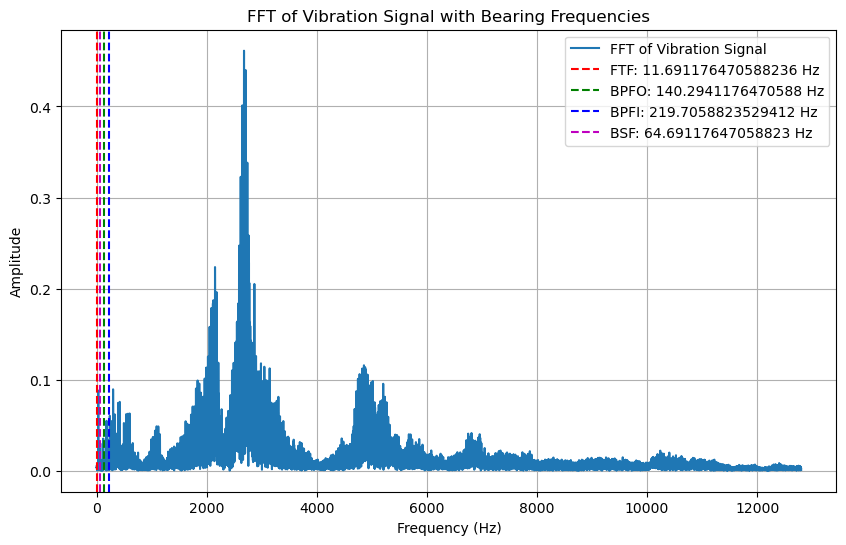

In [32]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

# 1. 주파수 피크 값 추출 (FFT 분석을 통한 피크 값 추출 함수)
def apply_fft(signal, sample_rate):
    N = len(signal)  # 신호의 길이
    T = 1.0 / sample_rate  # 샘플 간격 (시간)
    
    # 푸리에 변환 (FFT) 적용
    yf = fft(signal)
    xf = fftfreq(N, T)[:N // 2]  # 주파수 범위 계산
    amplitude = 2.0 / N * np.abs(yf[0:N // 2])  # 진폭 계산
    
    return xf, amplitude  # 주파수 성분과 진폭 반환

# 2. 시각화 함수
def plot_fft_with_bearing_frequencies(xf, yf, FTF, BPFO, BPFI, BSF):
    plt.figure(figsize=(10, 6))
    plt.plot(xf, yf, label='FFT of Vibration Signal')
    
    # BPFI, BPFO, FTF, BSF 주파수 표시 (수직선 추가)
    plt.axvline(x=FTF, color='r', linestyle='--', label=f'FTF: {FTF} Hz')
    plt.axvline(x=BPFO, color='g', linestyle='--', label=f'BPFO: {BPFO} Hz')
    plt.axvline(x=BPFI, color='b', linestyle='--', label=f'BPFI: {BPFI} Hz')
    plt.axvline(x=BSF, color='m', linestyle='--', label=f'BSF: {BSF} Hz')

    # 차트 세부 설정
    plt.title('FFT of Vibration Signal with Bearing Frequencies')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

# 3. 실행 예시
# 샘플링 속도와 샘플 데이터
sample_rate = 25600  # 샘플링 속도 (Hz)
signal = df.iloc[0, :-12].values  # 진동 신호 데이터 (첫 번째 행을 예시로 사용)

# 푸리에 변환 적용
xf, yf = apply_fft(signal, sample_rate)

# FTF, BPFO, BPFI, BSF 주파수 값들 (이미 계산된 값 사용)
FTF = df['FTF'].values[0]  # 첫 번째 행의 FTF 값
BPFO = df['BPFO'].values[0]  # 첫 번째 행의 BPFO 값
BPFI = df['BPFI'].values[0]  # 첫 번째 행의 BPFI 값
BSF = df['BSF'].values[0]  # 첫 번째 행의 BSF 값

# 시각화
plot_fft_with_bearing_frequencies(xf, yf, FTF, BPFO, BPFI, BSF)


In [39]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       'speed', 'f', 'FTF', 'BSF', 'BPFO', 'BPFI', 'FTF_peak', 'BSF_peak',
       'BPFO_peak', 'BPFI_peak'],
      dtype='object', length=25616)

In [40]:
df.iloc[:,-15:]

,pitch_diameter,ball_diameter,contact_angle,ball_count,Hz,speed,f,FTF,BSF,BPFO,BPFI,FTF_peak,BSF_peak,BPFO_peak,BPFI_peak
0,34.0,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882,2.181396,2.185766,2.183846,2.187759
1,34.0,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882,2.206928,2.232876,2.218704,2.255621
2,34.0,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882,2.204044,2.209853,2.206679,2.203358
3,34.0,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882,2.190892,2.192823,2.188389,2.225048
4,34.0,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882,2.184608,2.183811,2.184515,2.184971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,46.5,9.0,0,13,25600,1800,30.0,12.096774,74.596774,157.258065,232.741935,2.184539,2.184587,2.184250,2.182795
1715,46.5,9.0,0,13,25600,1800,30.0,12.096774,74.596774,157.258065,232.741935,2.184608,2.185037,2.184416,2.182829
1716,46.5,9.0,0,13,25600,1800,30.0,12.096774,74.596774,157.258065,232.741935,2.184599,2.184834,2.183753,2.182924
1717,46.5,9.0,0,13,25600,1800,30.0,12.096774,74.596774,157.258065,232.741935,2.184534,2.184733,2.183824,2.182855


In [49]:
df.iloc[540]['fault_type']

np.float64(1.0)

In [42]:
df.iloc[999]['fault_type']

np.float64(2.0)

In [41]:
df.iloc[1199]['fault_type']

np.float64(3.0)

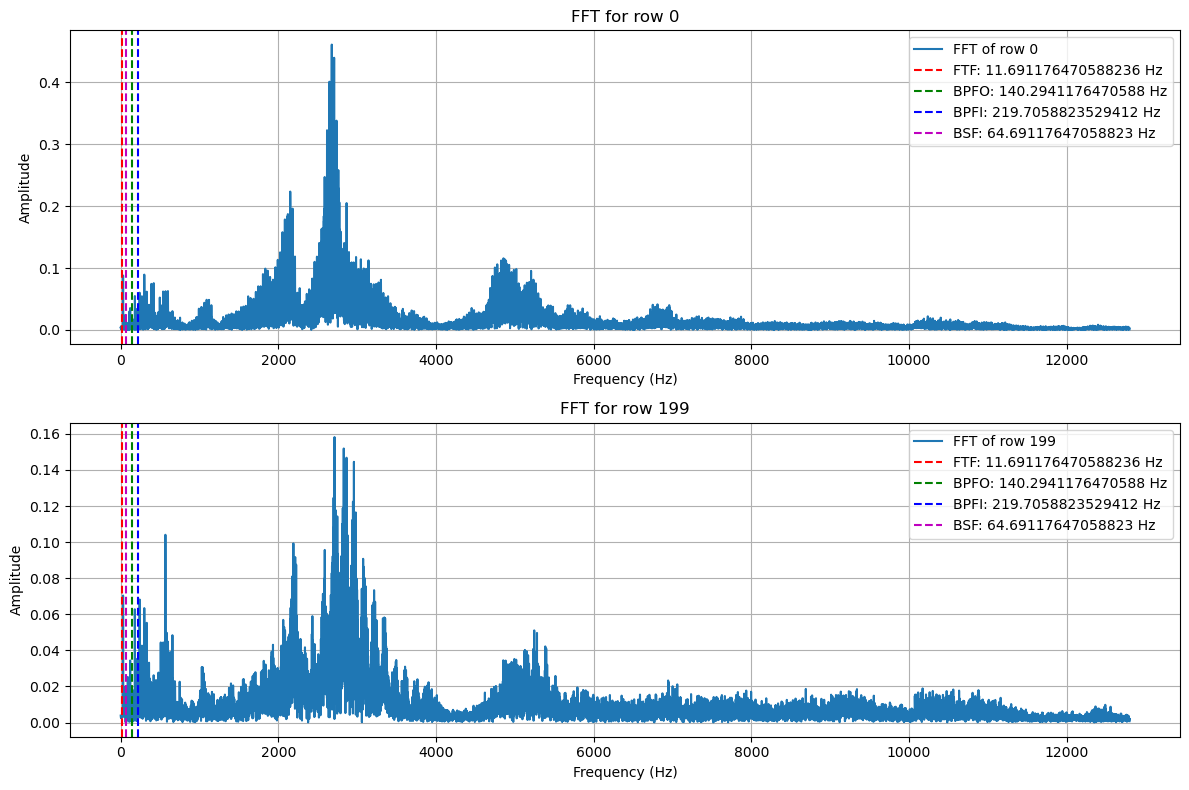

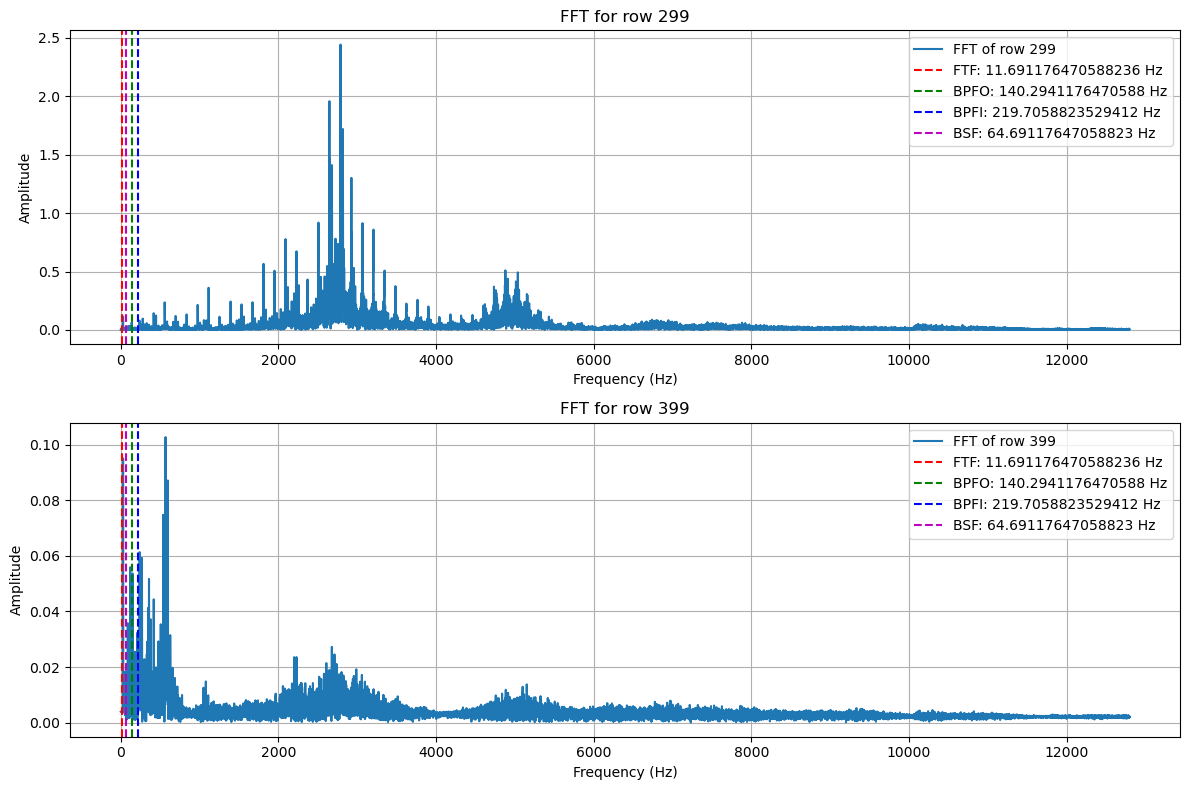

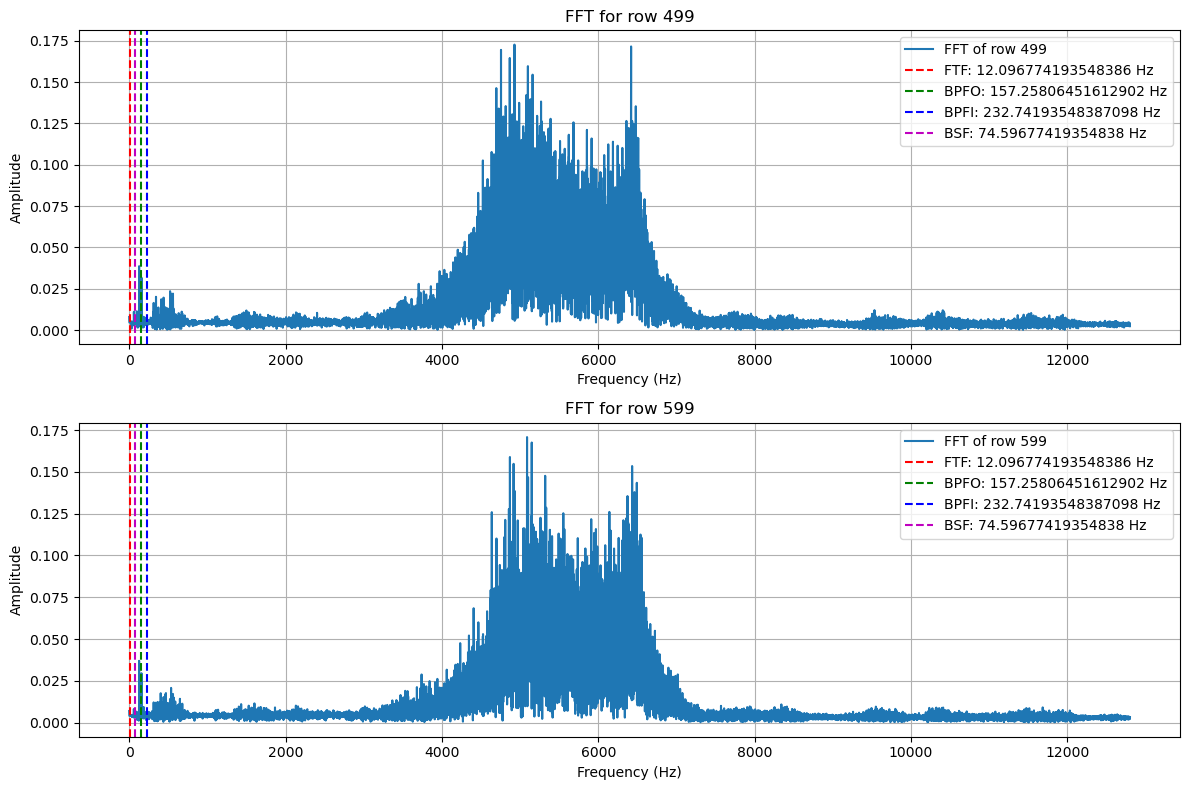

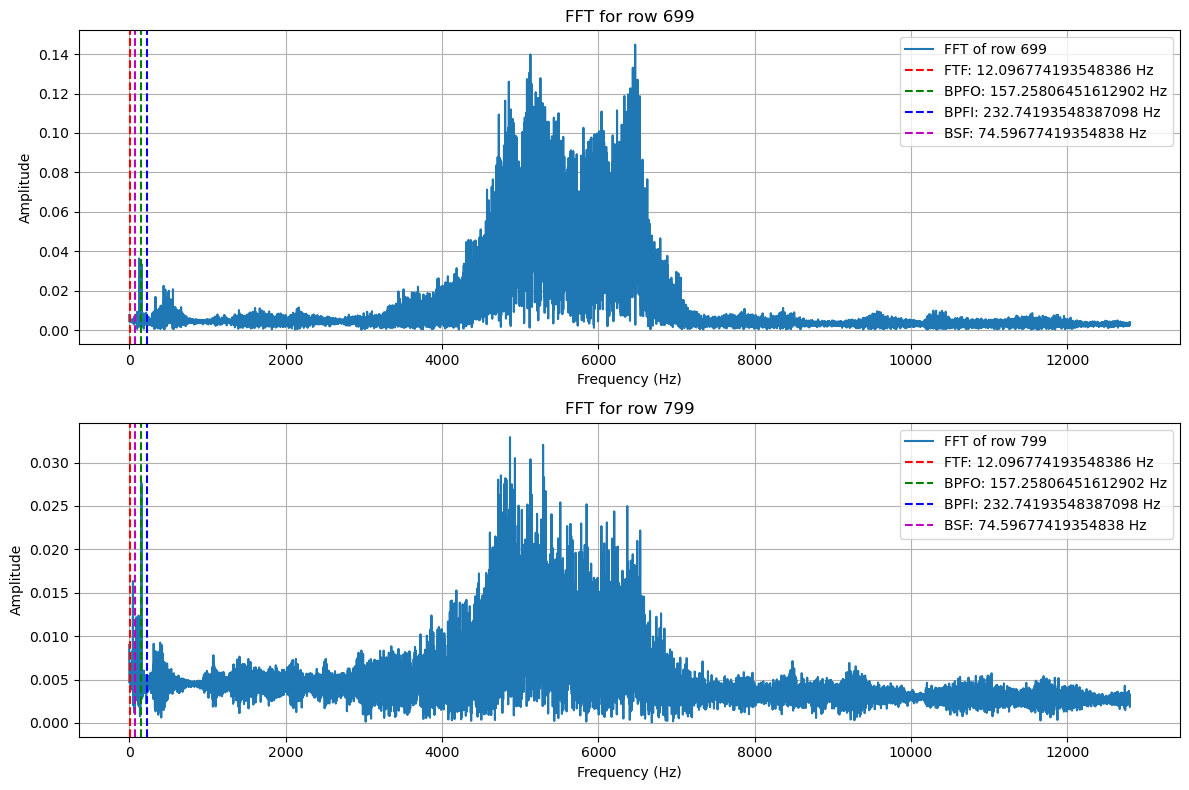

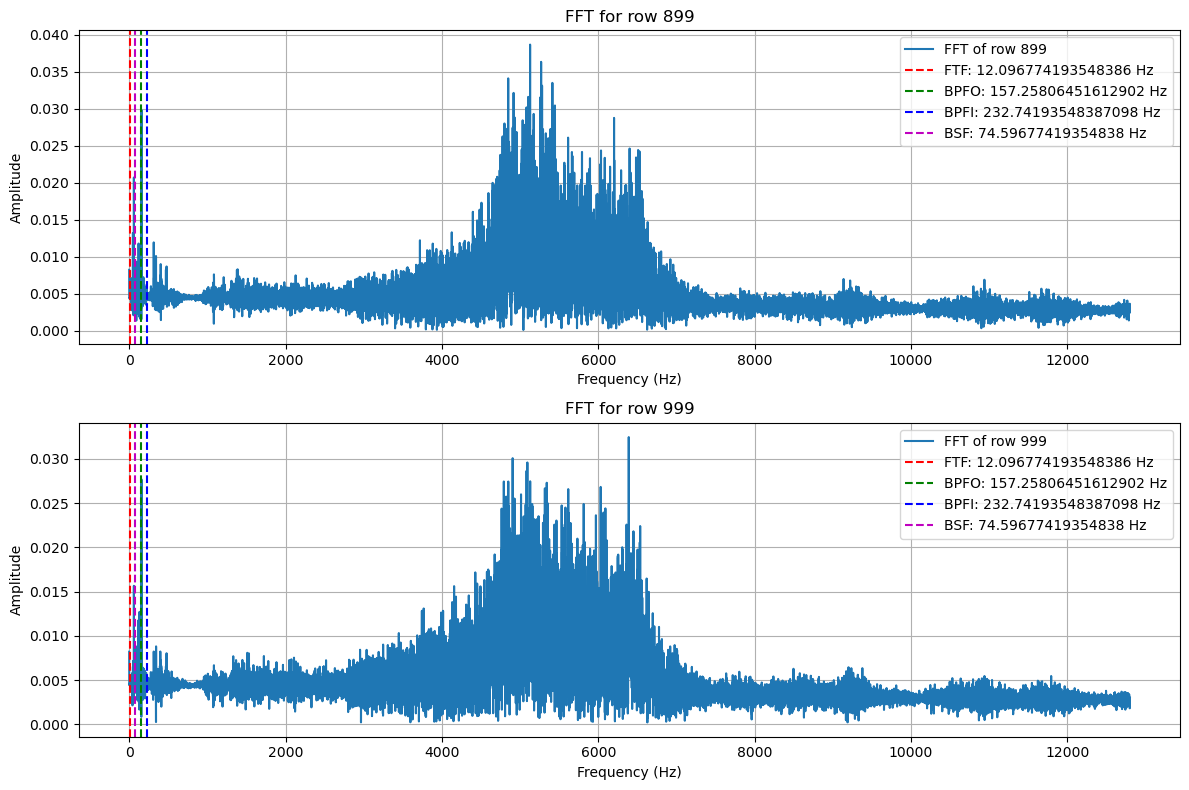

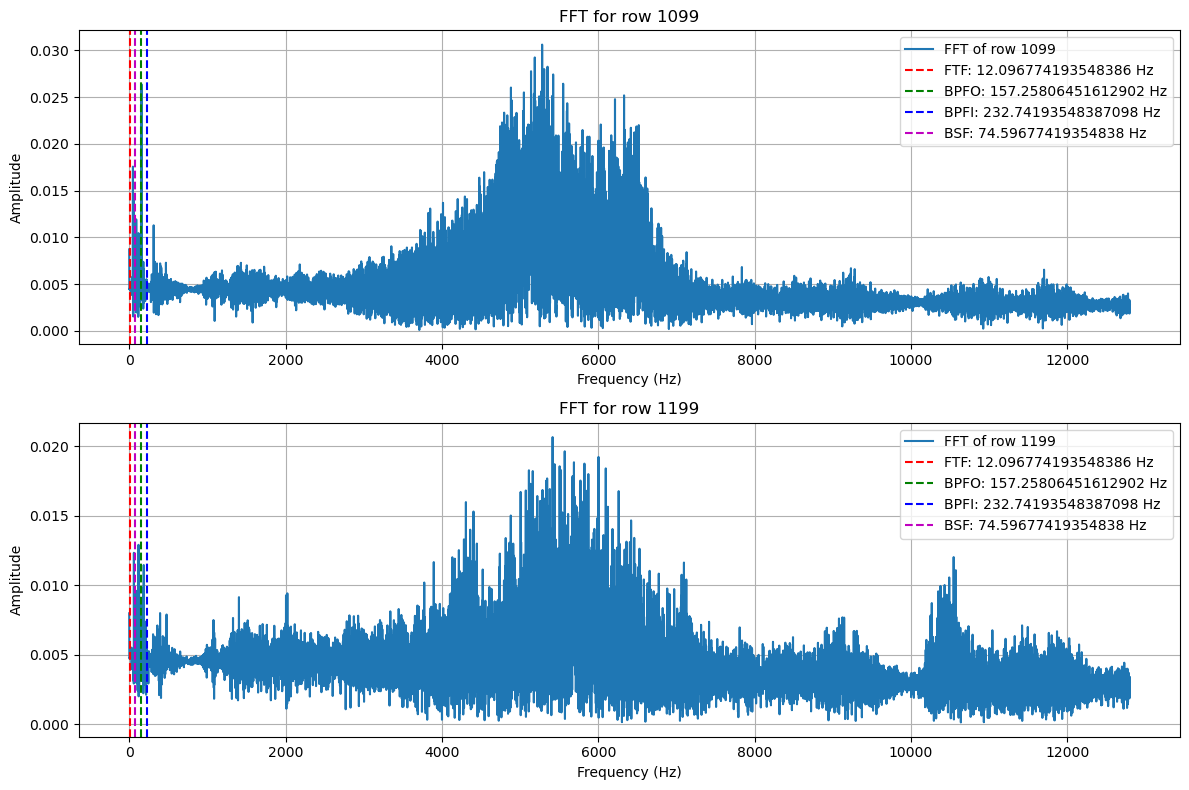

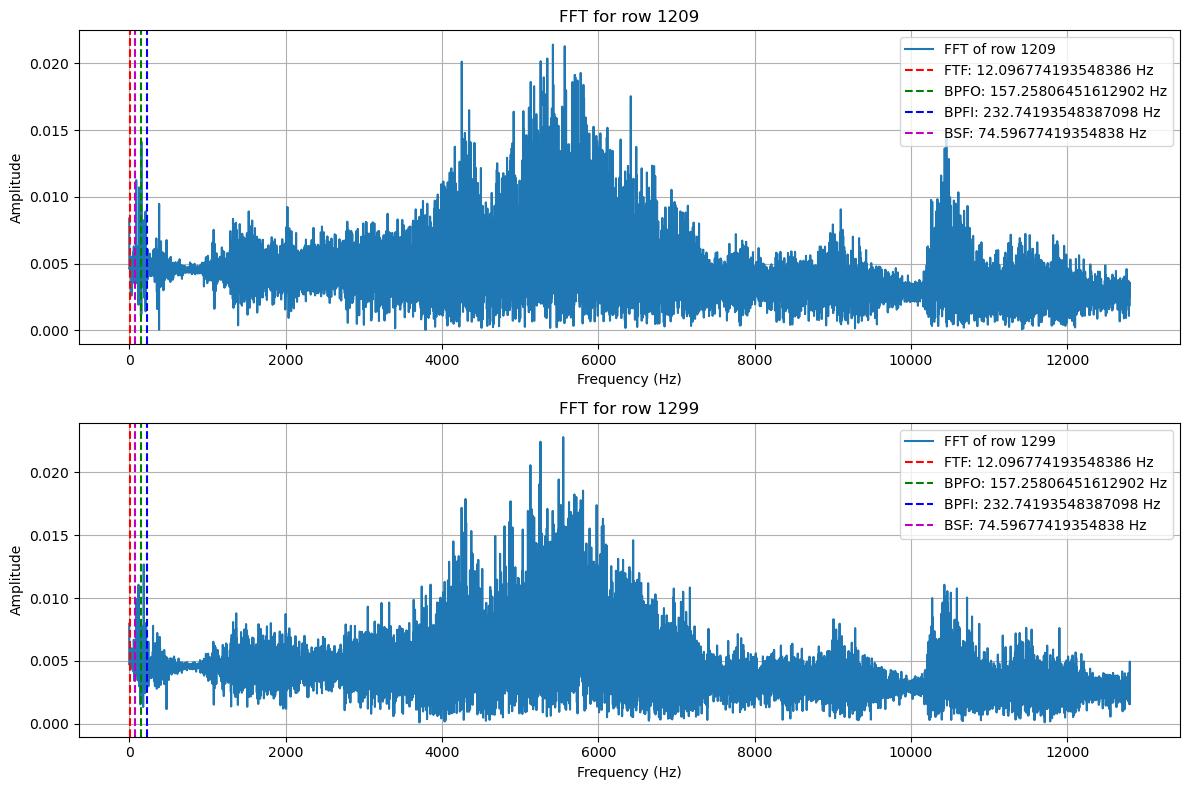

In [35]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

# 주파수 피크 값 추출 (FFT 분석을 통한 피크 값 추출 함수)
def apply_fft(signal, sample_rate):
    N = len(signal)  # 신호의 길이
    T = 1.0 / sample_rate  # 샘플 간격 (시간)
    
    # 푸리에 변환 (FFT) 적용
    yf = fft(signal)
    xf = fftfreq(N, T)[:N // 2]  # 주파수 범위 계산
    amplitude = 2.0 / N * np.abs(yf[0:N // 2])  # 진폭 계산
    
    return xf, amplitude  # 주파수 성분과 진폭 반환

# 시각화 함수 (한 번에 2개의 행씩 플롯 표시)
def plot_fft_two_rows(df, rows, sample_rate):
    plt.figure(figsize=(12, 8))
    
    for i, row in enumerate(rows):
        # 진동 신호 데이터 선택
        signal = df.iloc[row, :-12].values  # 진동 신호 데이터 (row 번째 행)
        
        # FFT 적용
        xf, yf = apply_fft(signal, sample_rate)
        
        # FTF, BPFO, BPFI, BSF 주파수 값들 추출
        FTF = df['FTF'].values[row]
        BPFO = df['BPFO'].values[row]
        BPFI = df['BPFI'].values[row]
        BSF = df['BSF'].values[row]
        
        # 서브플롯 설정
        plt.subplot(2, 1, i+1)  # 2행 1열의 서브플롯

        # 시각화
        plt.plot(xf, yf, label=f'FFT of row {row}')
        
        # BPFI, BPFO, FTF, BSF 주파수 표시 (수직선 추가)
        plt.axvline(x=FTF, color='r', linestyle='--', label=f'FTF: {FTF} Hz')
        plt.axvline(x=BPFO, color='g', linestyle='--', label=f'BPFO: {BPFO} Hz')
        plt.axvline(x=BPFI, color='b', linestyle='--', label=f'BPFI: {BPFI} Hz')
        plt.axvline(x=BSF, color='m', linestyle='--', label=f'BSF: {BSF} Hz')

        # 차트 세부 설정
        plt.title(f'FFT for row {row}')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(True)

    # 전체 그래프 레이아웃 설정
    plt.tight_layout()
    plt.show()

# 실행 예시
# 샘플링 속도 설정
sample_rate = 25600  # 샘플링 속도 (Hz)

# 확인하고 싶은 행들 (첫 번째, 200번째 등 2개씩 비교)
rows_to_plot = [[0, 199], [299, 399], [499, 599], [699, 799], [899, 999],[1099,1199],[1209,1299]]

# 한 번에 2개 행씩 출력
for rows in rows_to_plot:
    plot_fft_two_rows(df, rows, sample_rate)


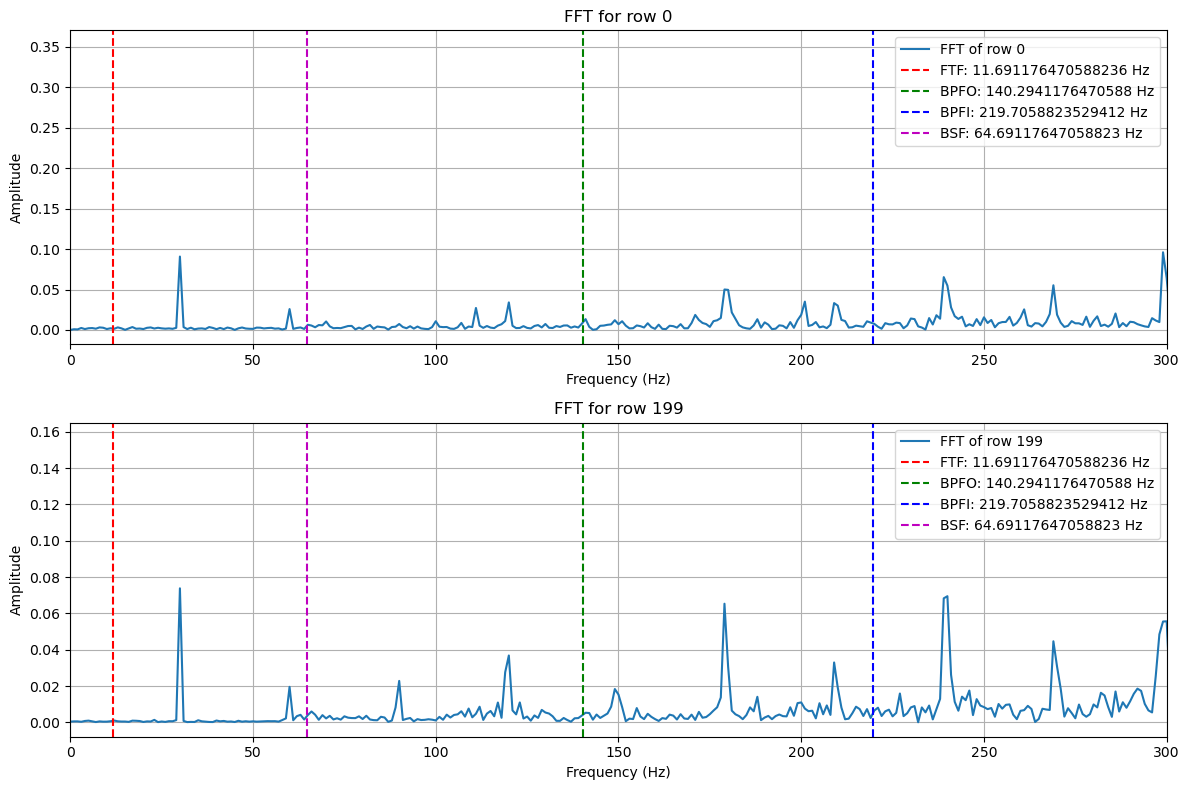

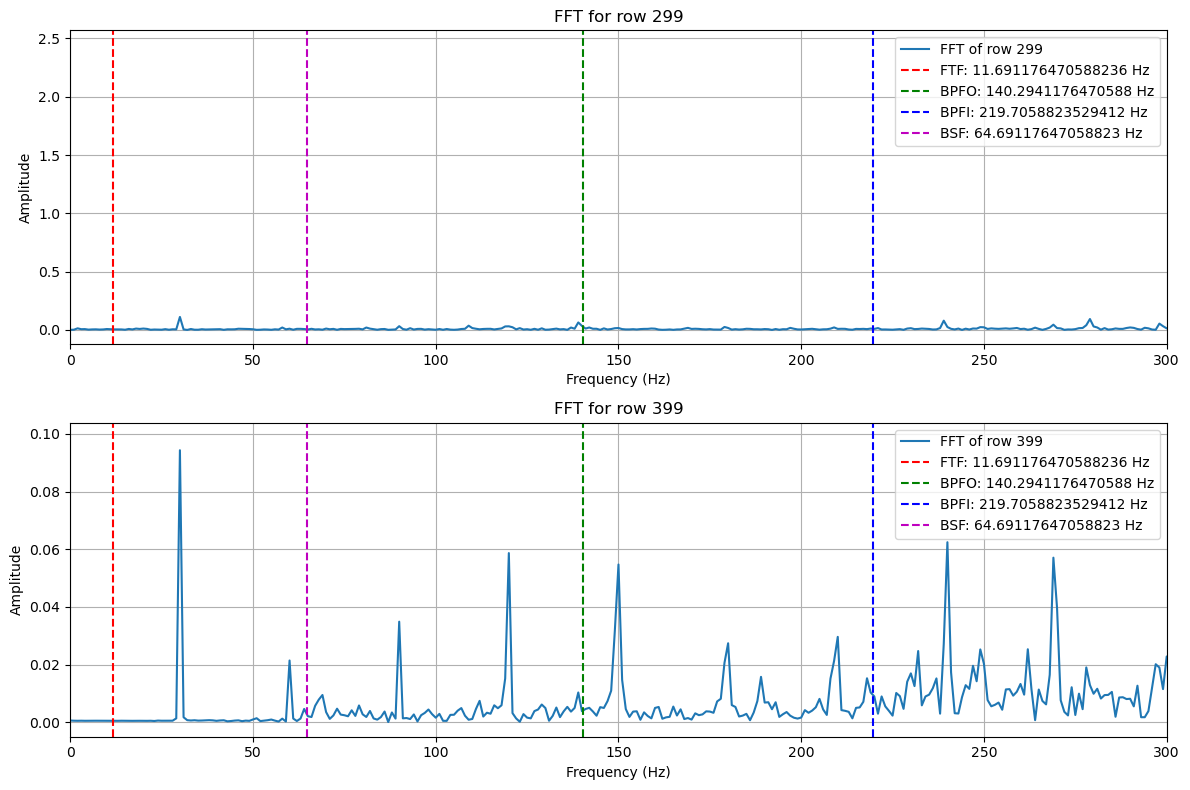

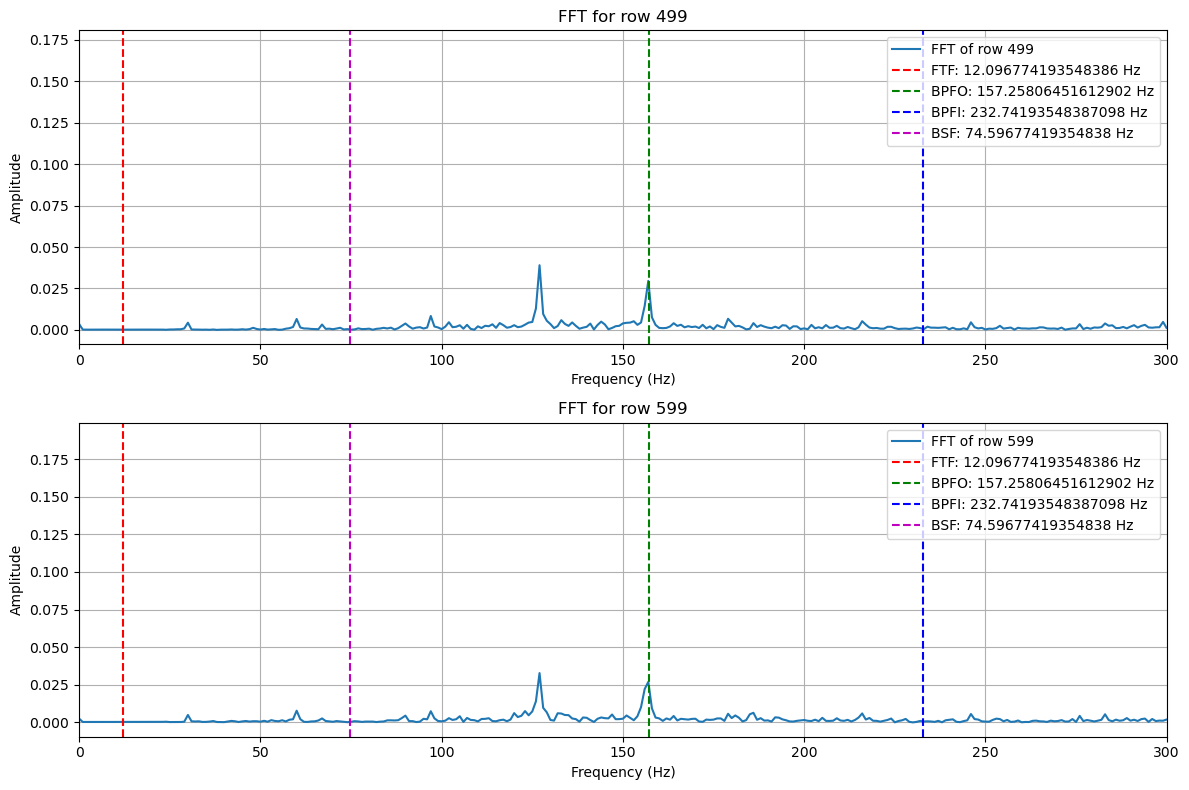

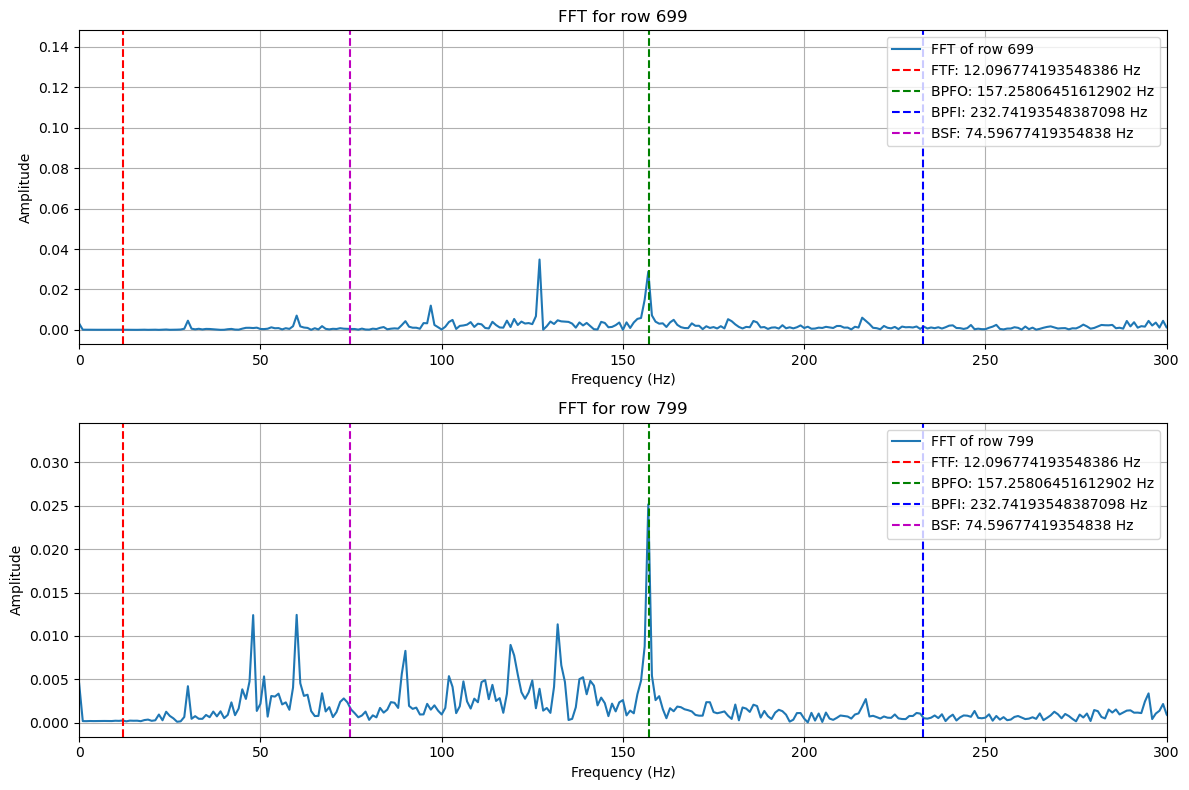

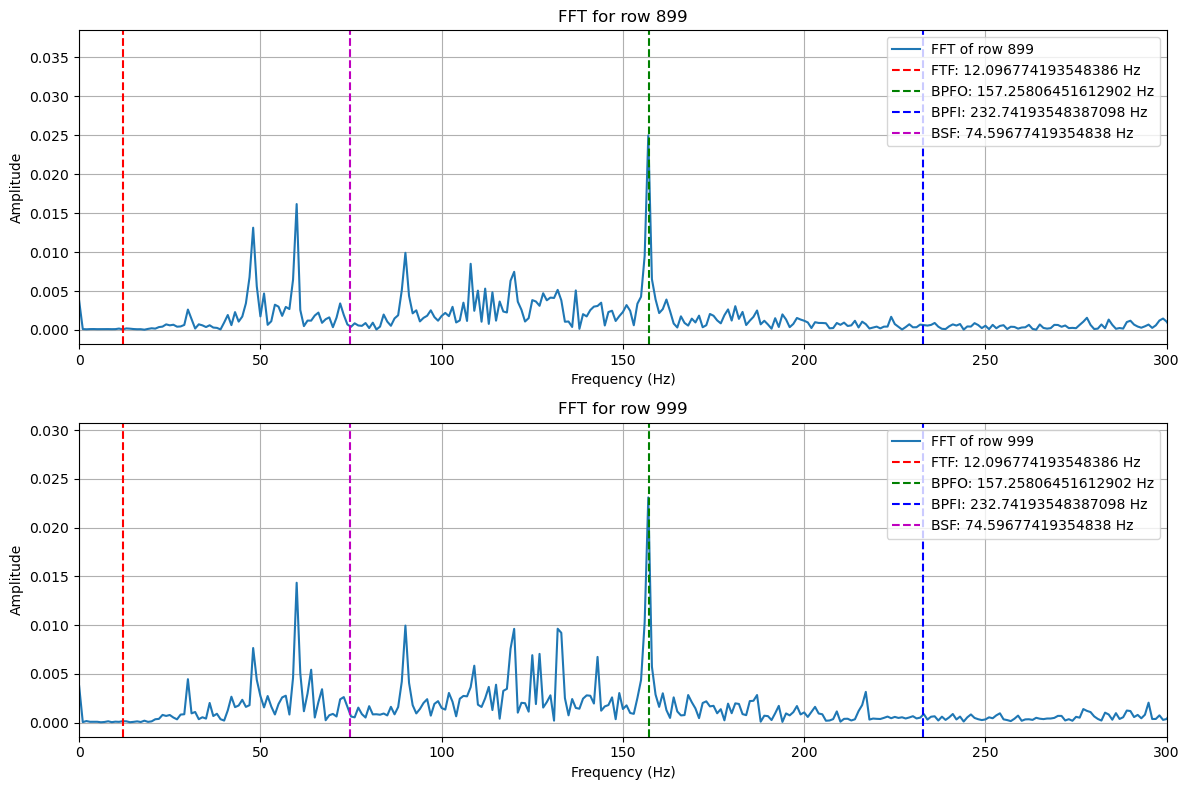

In [160]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

# 주파수 피크 값 추출 (FFT 분석을 통한 피크 값 추출 함수)
def apply_fft(signal, sample_rate):
    N = len(signal)  # 신호의 길이
    T = 1.0 / sample_rate  # 샘플 간격 (시간)
    
    # 푸리에 변환 (FFT) 적용
    yf = fft(signal)
    xf = fftfreq(N, T)[:N // 2]  # 주파수 범위 계산
    amplitude = 2.0 / N * np.abs(yf[0:N // 2])  # 진폭 계산
    
    return xf, amplitude  # 주파수 성분과 진폭 반환

# 시각화 함수 (한 번에 2개의 행씩 플롯 표시)
def plot_fft_two_rows(df, rows, sample_rate):
    plt.figure(figsize=(12, 8))
    
    for i, row in enumerate(rows):
        # 진동 신호 데이터 선택
        signal = df.iloc[row, :-12].values  # 진동 신호 데이터 (row 번째 행)
        
        # FFT 적용
        xf, yf = apply_fft(signal, sample_rate)
        
        # FTF, BPFO, BPFI, BSF 주파수 값들 추출
        FTF = df['FTF'].values[row]
        BPFO = df['BPFO'].values[row]
        BPFI = df['BPFI'].values[row]
        BSF = df['BSF'].values[row]
        
        # 서브플롯 설정
        plt.subplot(2, 1, i+1)  # 2행 1열의 서브플롯

        # 시각화
        plt.plot(xf, yf, label=f'FFT of row {row}')
        
        # BPFI, BPFO, FTF, BSF 주파수 표시 (수직선 추가)
        plt.axvline(x=FTF, color='r', linestyle='--', label=f'FTF: {FTF} Hz')
        plt.axvline(x=BPFO, color='g', linestyle='--', label=f'BPFO: {BPFO} Hz')
        plt.axvline(x=BPFI, color='b', linestyle='--', label=f'BPFI: {BPFI} Hz')
        plt.axvline(x=BSF, color='m', linestyle='--', label=f'BSF: {BSF} Hz')

        # x축 범위를 0~300Hz로 제한
        plt.xlim(0, 300)

        # 차트 세부 설정
        plt.title(f'FFT for row {row}')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(True)

    # 전체 그래프 레이아웃 설정
    plt.tight_layout()
    plt.show()

# 실행 예시
# 샘플링 속도 설정
sample_rate = 25600  # 샘플링 속도 (Hz)

# 확인하고 싶은 행들 (첫 번째, 200번째 등 2개씩 비교)
rows_to_plot = [[0, 199], [299, 399], [499, 599], [699, 799], [899, 999]]

# 한 번에 2개 행씩 출력
for rows in rows_to_plot:
    plot_fft_two_rows(df, rows, sample_rate)
